In [2]:
import pandas as pd
import scipy.stats as st
import statsmodels as s
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings
warnings.formatwarning = False
import seaborn as sns

In [3]:
data =pd.read_csv('F:/sql interveiw/Superstore Dataset.csv')

In [4]:
df = data.copy(deep= True)

In [5]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

how to know the cltv for customer 

# cltv analysis

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
(df['Order Date'].max()-df['Order Date'].min()).days

1457

In [8]:
''''##make our data frame 
# first we get the age of custome from date the first and the last i can know how many datues the customer
ex customer 1000 dayes the period he id active  
e###'''




 
cltv_data = df.groupby(['Customer ID']).agg({'Order Date':lambda date : (date.max()-date.min()).days,
                                             'Sales':lambda sale:sale.sum(),
                                             'Quantity': lambda x:x.sum(),
                                             'Order ID': lambda x : len(x)})

In [9]:
cltv_data.head()

,Order Date,Sales,Quantity,Order ID
Customer ID,,,,
AA-10315,1186,5563.560,30,11
AA-10375,1330,1056.390,41,15
AA-10480,1077,1790.512,36,12
AA-10645,1232,5086.935,64,18
AB-10015,996,886.156,13,6


In [10]:
cltv_data['Order Date']/365

Customer ID
AA-10315    3.249315
AA-10375    3.643836
AA-10480    2.950685
AA-10645    3.375342
AB-10015    2.728767
              ...   
XP-21865    3.827397
YC-21895    3.109589
YS-21880    2.942466
ZC-21910    3.068493
ZD-21925    2.791781
Name: Order Date, Length: 793, dtype: float64

In [11]:
# the average of value
cltv_data['aov'] = cltv_data['Sales']/cltv_data['Quantity']

In [12]:
# frequancy 
cltv_data['frequancy'] = cltv_data['Quantity']/len(cltv_data)

In [13]:
# the percentage of reapested his purchase 
cltv_data[cltv_data['Order ID']>1].shape[0]/len(cltv_data)

0.9936948297604036

In [14]:
# the dead customer they are dont repeated
chrun_rate = 1-0.9936948297604036

In [15]:
cltv_data['cltv'] = ((cltv_data['aov']*cltv_data['frequancy'])/chrun_rate)

In [16]:
# how the value of customer for the year i run my busniss
cltv_data.head()

,Order Date,Sales,Quantity,Order ID,aov,frequancy,cltv
Customer ID,,,,,,,
AA-10315,1186,5563.560,30,11,185.452000,0.037831,1112.7120
AA-10375,1330,1056.390,41,15,25.765610,0.051702,211.2780
AA-10480,1077,1790.512,36,12,49.736444,0.045397,358.1024
AA-10645,1232,5086.935,64,18,79.483359,0.080706,1017.3870
AB-10015,996,886.156,13,6,68.165846,0.016393,177.2312


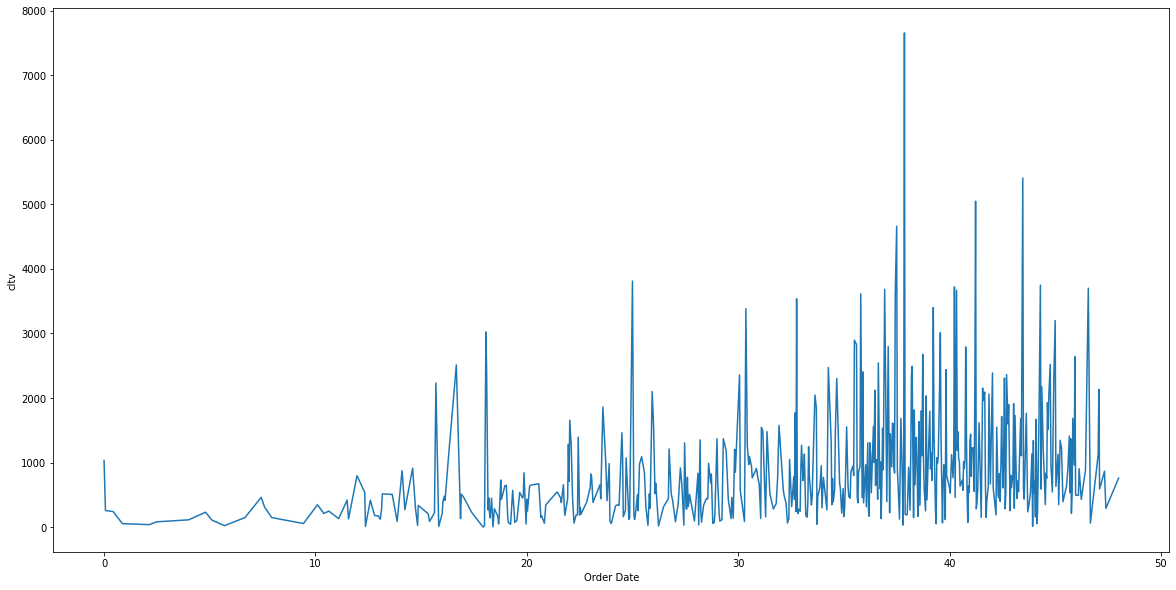

In [17]:
plt.figure(figsize=(20,10))
sns.lineplot(data = cltv_data.groupby(cltv_data['Order Date'].apply(lambda x : int(x)/30))['cltv'].sum().sort_values())
plt.show()

that mean most of customer period as acustomer is between 40 month to the above

# cohort analysis

In [28]:
import datetime as dt

In [36]:
# first have to know the current month and year 
df['month'] = df['Order Date'].dt.to_period('M')

In [37]:
df['cohort'] = df.groupby('Customer ID')['Order Date'].transform(min).dt.to_period('M')

In [38]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,cohort
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,...,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,2019-01,2019-01
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,2019-01,2019-01
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,2019-01,2019-01
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2019-01,2019-01
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,...,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,2019-01,2019-01


In [39]:
df_cohort = df.groupby(['cohort','month']).agg(n_customer = ('Customer ID' , 'nunique')).reset_index(drop=False)

In [40]:
from operator import attrgetter

In [41]:
df_cohort['period'] = (df_cohort['month']-df_cohort['cohort']).apply(attrgetter('n'))

In [42]:
df_cohort.tail()

,cohort,month,n_customer,period
890,2022-07,2022-07,2,0
891,2022-07,2022-12,1,5
892,2022-09,2022-09,1,0
893,2022-10,2022-10,2,0
894,2022-11,2022-11,1,0


In [43]:
piviot = df_cohort.pivot_table( index='cohort',columns='period',values='n_customer')

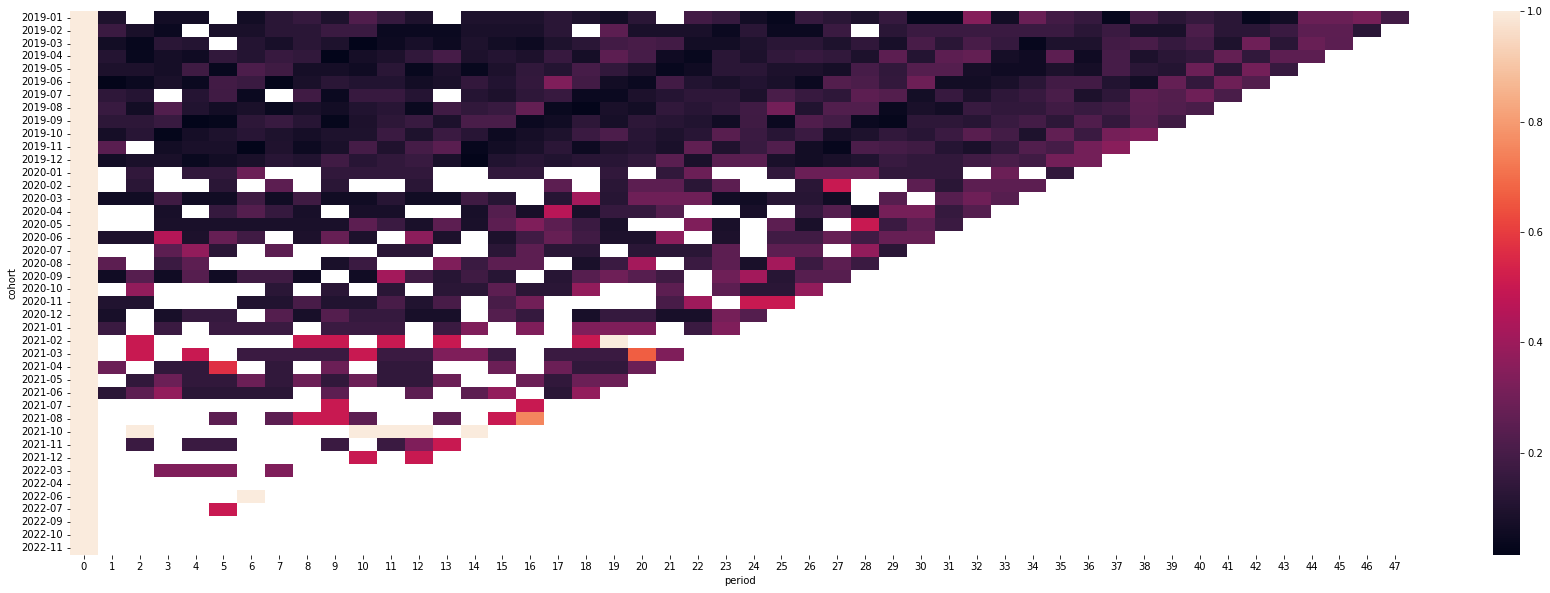

In [53]:
plt.figure(figsize=(30,10))
sns.heatmap(piviot.divide(piviot.iloc[:,0],axis=0))
plt.show()

the first day till me it the best acqasation customer and when the year pass the customer aquation get littel
and get seasonality in purchase period